In [1]:
# Generate the data set

import numpy as np

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

In [2]:
## Normal Equation ##

# Using inv() from numpy's linear algera module (np.linalg)

x_b = np.c_[np.ones((100,1)),x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Actual function used to generate the data => y=4+3x1

theta_best

array([[4.23449665],
       [2.85420688]])

In [3]:
# Make predictions

x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new] # add x0 =1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.23449665],
       [9.94291042]])

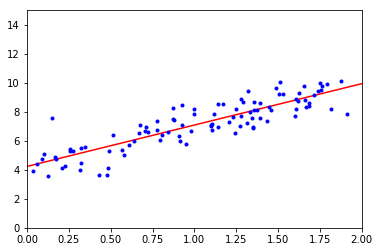

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, 'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.23449665]), array([[2.85420688]]))

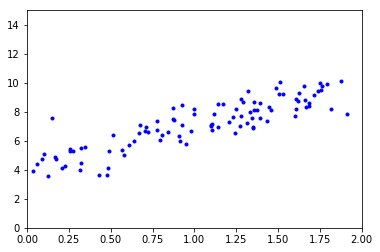

In [6]:
plt.plot(lin_reg.intercept_, lin_reg.coef_, 'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
lin_reg.predict(x_new)

array([[4.23449665],
       [9.94291042]])

In [8]:
# The LinearRegression class is based on the scipy.linalg.lstsq()function which you could call directly

theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.23449665],
       [2.85420688]])

In [9]:
# Use np.linalg.pinv() to compute teh pseudoinverse directly.

np.linalg.pinv(x_b).dot(y)

array([[4.23449665],
       [2.85420688]])

In [10]:
## Gradient Descent ##

# Tweaking parameters iteratively to minimize a cost.

# When using gradient descent make sure all features have similar scale.
# Use Scikit-Learn's StandardScaler

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta # identical to the normal equation

array([[4.23449665],
       [2.85420688]])

In [11]:
## Stochastic Gradient Descent ##

# Stchasctic Gradient Descent (SGD) finds the global minimum by randomly finding points of optimization. 

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initalization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.17886069],
       [2.86551019]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.18301151]), array([2.84888722]))

In [13]:
## Mini-batch Gradient Descent ##



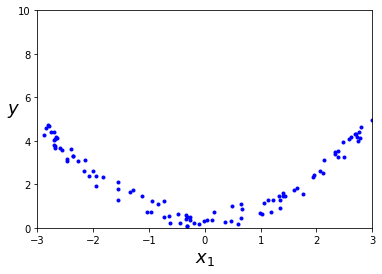

In [14]:
## Polynomial Regression ##

# Using a linear model to fit non-linear data

# Polynomial regression means adding powers to each feature as new features.

# Using a quadratic equation to produce non-linear data.
m = 100
x = 6* np.random.rand(m, 1) - 3
y = 0.5 * x**2 + np.random.rand(m,1)

# plt.plot(x,y,'b.')
# plt.axis([-3,3,0,10])
# plt.show()

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [15]:
# Using Scikit-Learn's PolynomialFeatures class to transform our training data.

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([0.64412402])

In [16]:
x_poly[0]

array([0.64412402, 0.41489575])

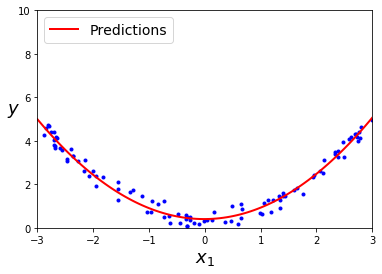

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_


x_new=np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

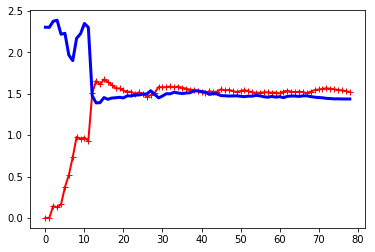

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='val')
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)